**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/xgboost).**

---


In this exercise, you will use your new knowledge to train a model with **gradient boosting**.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex6 import *
print("Setup Complete")

Setup Complete


You will work with the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) dataset from the previous exercise. 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Step 1: Build model

### Part A

In this step, you'll build and train your first model with gradient boosting.

- Begin by setting `my_model_1` to an XGBoost model.  Use the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class, and set the random seed to 0 (`random_state=0`).  **Leave all other parameters as default.**
- Then, fit the model to the training data in `X_train` and `y_train`.

In [3]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0) # Your code here

# Fit the model
my_model_1.fit(X_train, y_train) # Your code here

# Check your answer
step_1.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# Lines below will give you a hint or solution code
#step_1.a.hint()
#step_1.a.solution()

### Part B

Set `predictions_1` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.

In [5]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = my_model_1.predict(X_valid) # Your code here

# Check your answer
step_1.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [6]:
# Lines below will give you a hint or solution code
#step_1.b.hint()
#step_1.b.solution()

### Part C

Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions for the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In [7]:
# Calculate MAE
mae_1 = mean_absolute_error(y_valid, predictions_1) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)

# Check your answer
step_1.c.check()

Mean Absolute Error: 17662.736729452055


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [8]:
# Lines below will give you a hint or solution code
#step_1.c.hint()
#step_1.c.solution()

# Step 2: Improve the model

Now that you've trained a default model as baseline, it's time to tinker with the parameters, to see if you can get better performance!
- Begin by setting `my_model_2` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to get better results.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_2` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_2` must attain lower MAE than the model in `my_model_1`. 

In [9]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

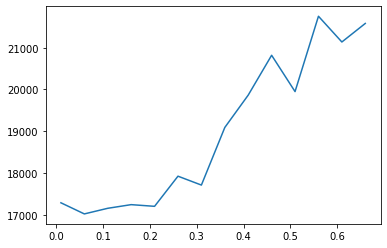

In [10]:
def get_score(lr):
    my_model = XGBRegressor(n_estimators= 500, learning_rate= lr, early_stopping_rounds=5) # Your code here
    my_model.fit(X_train, y_train,
             eval_set=[(X_valid, y_valid)],
             verbose=False) # Your code here
    preds = my_model.predict(X_valid) # Your code here
    mae = mean_absolute_error(y_valid, preds) # Your code here
    return mae

import numpy as np
import seaborn as sns
scores = {lr:get_score(lr) for lr in np.arange(0.01, 0.705, 0.05)}

sns.lineplot(y= scores.values(), x= scores.keys());

In [11]:
best_score = min(scores.items(), key= lambda x:x[1])
print(f"Best MAE: {best_score[1]} with lr= {best_score[0]}")

Best MAE: 17021.28149079623 with lr= 0.060000000000000005


In [12]:
# Define the model
my_model_2 = XGBRegressor(n_estimators= 500, learning_rate= best_score[0], early_stopping_rounds=5) # Your code here
my_model_2.fit(X_train, y_train,
         eval_set=[(X_valid, y_valid)],
         verbose=False) # Your code here
predictions_2 = my_model_2.predict(X_valid) # Your code here
mae_2 = mean_absolute_error(y_valid, predictions_2) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

# Check your answer
step_2.check()

Mean Absolute Error: 17021.28149079623


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [13]:
# Lines below will give you a hint or solution code
#step_2.hint()
#step_2.solution()

# Step 3: Break the model

In this step, you will create a model that performs worse than the original model in Step 1.  This will help you to develop your intuition for how to set parameters.  You might even find that you accidentally get better performance, which is ultimately a nice problem to have and a valuable learning experience!
- Begin by setting `my_model_3` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to design a model to get high MAE.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_3` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_3` must attain higher MAE than the model in `my_model_1`. 

In [14]:
# Define the model
my_model_3 = XGBRegressor(n_estimators= 10, learning_rate= 1) # Your code here
my_model_3.fit(X_train, y_train) # Your code here
predictions_3 = my_model_3.predict(X_valid) # Your code here
mae_3 = mean_absolute_error(y_valid, predictions_3) # Your code here

In [15]:
# Define the model
my_model_3 = XGBRegressor(n_estimators= 10, learning_rate= 1)

# Fit the model
my_model_3.fit(X_train, y_train) # Your code here

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(y_valid, predictions_3)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_3)

# Check your answer
step_3.check()

Mean Absolute Error: 25948.06064051798


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [16]:
# Lines below will give you a hint or solution code
#step_3.hint()
#step_3.solution()

# Keep going

Continue to learn about **[data leakage](https://www.kaggle.com/alexisbcook/data-leakage)**.  This is an important issue for a data scientist to understand, and it has the potential to ruin your models in subtle and dangerous ways!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intermediate-machine-learning/discussion) to chat with other learners.*